In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [46]:
titanic = sns.load_dataset('titanic')
titanic


survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [47]:
#1
titanic.drop(['deck'], axis=1, inplace=True)

In [53]:
#1
# titanic.drop(titanic['age'].isnull())
titanic.drop(titanic[titanic['age'].isnull()].index, inplace=True)

In [54]:
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [129]:
#2
print(titanic[titanic['alive'] == 'yes']['survived'].count())
print(titanic[titanic['alive'] == 'no']['survived'].count())


290
424


In [109]:
#3
s = titanic[titanic['survived'] == 1].groupby('pclass')['survived']
a = titanic.groupby('pclass')['survived']


for n1,n2 in zip(s.count(),a.count()):
    print(n1/n2*100)


# s.count()[1]
# s.count
# for n1,n2 in zip(s.count(),a.count()):
#     print(n1,n2)

65.59139784946237
47.97687861271676
23.943661971830984


In [221]:
#4
t = titanic[titanic.sibsp !=0].groupby('survived').count()['pclass']
t[1] / t.sum()
# df.groupby(df.index.year)
#titanic[titanic.sibsp !=0]

0.4732510288065844

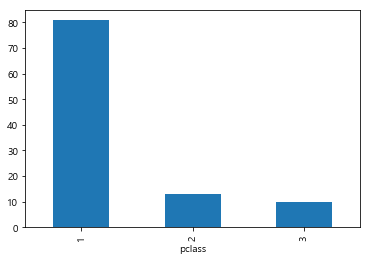

In [162]:
#5
titanic.groupby('pclass')['fare'].std().plot(kind='bar')

In [218]:
#6
g = titanic[titanic.alone==True].groupby('survived').count()['pclass']
g[1] / g.sum()


0.3217821782178218

In [215]:
#7
man = titanic[titanic['sex'] == 'male'].groupby('survived').count()['sex']

man[1] / man.sum()
# wm = titanic[titanic['sex'] != 'male'].groupby('survived').count()['sex']
# man


0.2052980132450331

In [216]:
#7
wm = titanic[titanic['sex'] != 'male'].groupby('survived').count()['sex']
wm[1] / wm.sum()

0.7547892720306514

In [225]:
def fn(n) :
    if 1 <= n <15:
        return '미성년자'
    elif 15 <= n < 25:
        return '청년'
    elif 25 <= n < 35:
        return '중년'
    elif 35 <= n < 60:
        return '장년'
    elif n >= 60:
        return '노년'

titanic['나이분류']= titanic['age'].apply(fn)
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

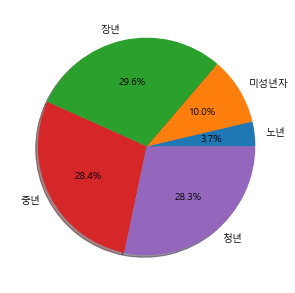

In [250]:
fruit = ['노년','미성년자','장년', '중년','청년']
# cnt = [7,6,3,2,2]
plt.figure(figsize=[5,5])
ddd=[]
# titanic.groupby('나이분류').count()['sex']
for n in titanic.groupby('나이분류').count()['sex']:
    ddd.append(n)


# for n in titanic['나이분류']:
#     print(n)
#     ddd.append(n)
# ddd
# type(titanic['나이분류'])
# titanic['나이분류']
plt.pie(ddd, labels=fruit, autopct='%.1f%%', shadow=True)
plt.show()